El rendimiento académico de los estudiantes es un fenómeno influenciado por múltiples factores vinculados tanto al contexto familiar como al comportamiento individual. Comprender qué variables impactan con mayor fuerza en los resultados permite orientar estrategias educativas más efectivas.

En este proyecto se analiza un conjunto de datos sobre desempeño estudiantil con el objetivo de identificar qué factores explican el puntaje final de los alumnos (Exam_Score). A través de un análisis exploratorio de datos (EDA), se estudian variables como la asistencia a clases, las horas de estudio, el nivel educativo de los padres, el desempeño previo y las horas de sueño.

Posteriormente, se evalúan las relaciones entre estas variables mediante visualizaciones, métricas estadísticas y pruebas de hipótesis, para finalmente construir un modelo predictivo basado en regresión lineal que permita estimar el rendimiento académico a partir de características observables del estudiante.

El objetivo principal es no solo describir los datos, sino también extraer conclusiones interpretables y construir una herramienta básica de predicción que evidencie cuáles son los factores con mayor impacto en el desempeño escolar.

In [3]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-performance-factors' dataset.
Path to dataset files: /kaggle/input/student-performance-factors


In [4]:
print(os.listdir(path))
file_path = path + "/StudentPerformanceFactors.csv"
df = pd.read_csv(file_path)
df.head() #primeras filas
df.shape #cantidad de filas y columnas

['StudentPerformanceFactors.csv']


(6607, 20)

In [5]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [6]:
df.info() #estructura y ipo de datos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [8]:
df.columns #nombres de columnas

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [9]:
df.isnull().sum() #valores nulos

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


<Axes: >

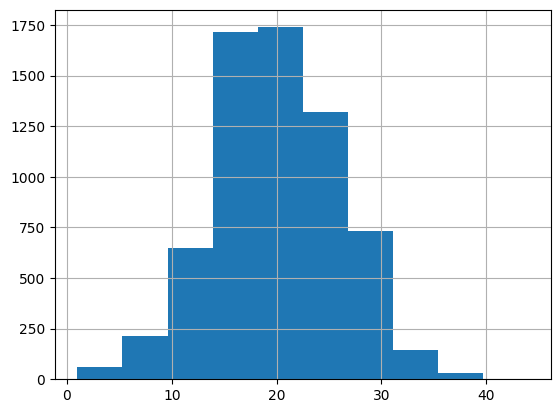

In [10]:
df["Hours_Studied"].hist()

# **Limpieza del dataset**

In [11]:
df_clean = df.copy() #copia de seguridad

In [12]:
df_clean.isnull().sum()  #detecto los nulos por columna

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


teacher_quality 78 nulos parental_education_level = 90 nulos  distance_from_home 67 nulos. Para lo que quiero averiguar teacher quality no es importante. parental eduaction si, es una de las variables a analizar

In [13]:
mode_pe = df["Parental_Education_Level"].mode().iloc[0]         #pe es variable categoria por lo que no se puede usar media.
print(mode_pe)                                                  # fillna me reemplaza los nulos por la moda.
                                                                #iloc lo uso para acceder al indice es el lugar 0 lo que mas se repite
                                                                #y corresponde a high school

df_clean["Parental_Education_Level"].fillna(mode_pe, inplace= True)

High School


/tmp/ipython-input-2288960945.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["Parental_Education_Level"].fillna(mode_pe, inplace= True)


In [15]:
df_clean.dropna(inplace= True)  #borro los datos nulos de las columnas que no me sirven

In [16]:
df_clean["Exam_Score"] = pd.to_numeric(df_clean["Exam_Score"], errors="coerce") #convierto todo a numeros
df_clean["Exam_Score"].isna().sum()  #isna= marca los nulos como true y el sum cuenta los true

np.int64(0)

In [17]:
df_clean.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000
mean,19.985458,80.021658,7.031869,75.054146,1.493967,2.970916,67.250000
std,5.988909,11.547579,1.468291,14.398439,1.231627,1.030446,3.906536
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


<Axes: >

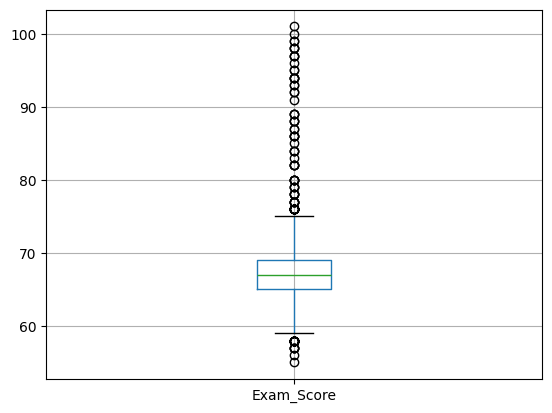

In [18]:
df_clean.boxplot(column="Exam_Score")

In [19]:
df_clean[df_clean["Exam_Score"] == 101]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


Analizando la columnas de Exam_Scores vemos que tenemos cerca del 50% concentrado entre 65 y 67. Hay bastantes outliers y un caso particular donde el Score es de 101, suponiendo que la maxima nota es de 100, existe una discrepancia que puede ser entendida como que obtuvo un bonus, analizando las notas previas, las horas de estudio y la asistencia a clase tiene sentido que haya tenido una nota maxima y algun bonus. La presencia de outliers nos indica que la mayoria ronda los 67 puntos pero existen casos en donde desaprueban o son sobresalientes, cuestiones comunes en una escuela

In [20]:
df_clean.to_csv("estudiantes_limpio.csv", index=False)

In [21]:
df = pd.read_csv("estudiantes_limpio.csv")

La variable objetivo es Exam_Score porque el objetivo es ver como diversos factores impactan en el rendimiento escolar del alumno.

In [22]:
df["Exam_Score"].describe()

,Exam_Score
count,6464.000000
mean,67.250000
std,3.906536
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,101.000000


Como analizamos anteriormente los valores rondan en un 67,25. Los datos estan concentrados y no existe mucha dispersion solo 3,90.

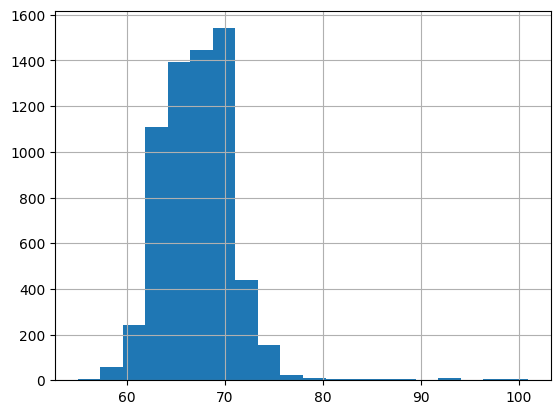

In [23]:
df["Exam_Score"].hist(bins=20)
plt.show()

In [19]:
df["Exam_Score"].skew() #coeficiente de asimetría

np.float64(1.6658308149706298)

La variable es asimetrica positiva: la mayoria de los valores se concentran a la izquierda de la distribución, con una cola hacia la derecha donde se ubican los valores mas altos. Además los resultados se agrupan cerca de la media y se observan valores extremos.
El coeficiente de asimetría obtenido es positivo, lo que confirma que la distribución presenta una cola hacia los valores más altos.

Influye el nivel academico de los padres en el rendimiento del estidiante?

In [24]:
df_clean["Parental_Education_Level"].unique() #muestra todos los valores distintos
df_clean["Parental_Education_Level"].value_counts()  #reviso cuando hay de cada uno para ver si hay algo raro

,count
Parental_Education_Level,
High School,3245
College,1939
Postgraduate,1280


In [25]:
df_clean.groupby("Parental_Education_Level")["Exam_Score"].mean().sort_values()

,Exam_Score
Parental_Education_Level,
High School,66.900154
College,67.358432
Postgraduate,67.972656


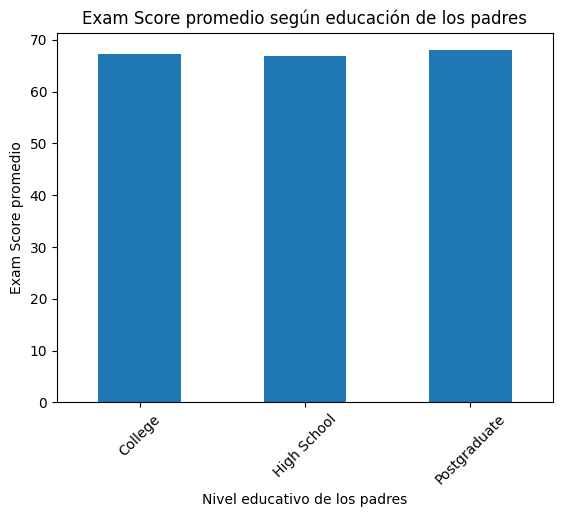

In [26]:
df.groupby("Parental_Education_Level")["Exam_Score"].mean().plot(kind="bar")
plt.title("Exam Score promedio según educación de los padres")
plt.xlabel("Nivel educativo de los padres")
plt.ylabel("Exam Score promedio")
plt.xticks(rotation=45)
plt.show()

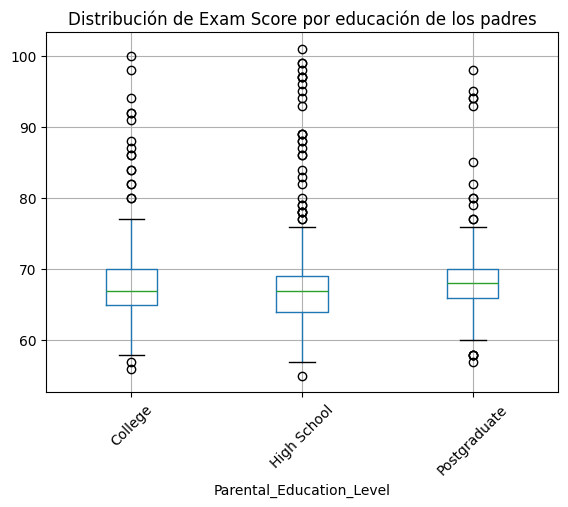

In [27]:
df.boxplot(column="Exam_Score", by="Parental_Education_Level")
plt.title("Distribución de Exam Score por educación de los padres")
plt.suptitle("")
plt.xticks(rotation=45)
plt.show()

ANOVA

In [28]:
high = df_clean[df_clean["Parental_Education_Level"] == "High School"]["Exam_Score"]
college = df_clean[df_clean["Parental_Education_Level"] == "College"]["Exam_Score"]
post = df_clean[df_clean["Parental_Education_Level"] == "Postgraduate"]["Exam_Score"]

stats.f_oneway(high, college, post)

F_onewayResult(statistic=np.float64(36.04678606428582), pvalue=np.float64(2.702565925279912e-16))

Al analizar el puntaje promedio según el nivel educativo de los padres, se observa una leve tendencia creciente desde High School (66.89) hasta Postgraduate (67.97). Sin embargo, la diferencia entre los grupos es reducida (aproximadamente 1 punto).

El boxplot muestra una alta superposición entre las distribuciones, con medianas y rangos intercuartílicos muy similares, lo que indica que el impacto práctico del nivel educativo parental es limitado.
Pero al aplicar un test ANOVA se obtiene un p-value < 0.05, lo que confirma que las diferencias observadas son estadísticamente significativas y no producto del azar.

En consecuencia, aunque el nivel educativo de los padres muestra una asociación con el rendimiento, su efecto es moderado y probablemente menor frente a variables como las horas de estudio, la asistencia o el desempeño previo.

In [29]:
df_clean[["Hours_Studied","Exam_Score"]].corr()

,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.446072
Exam_Score,0.446072,1.000000


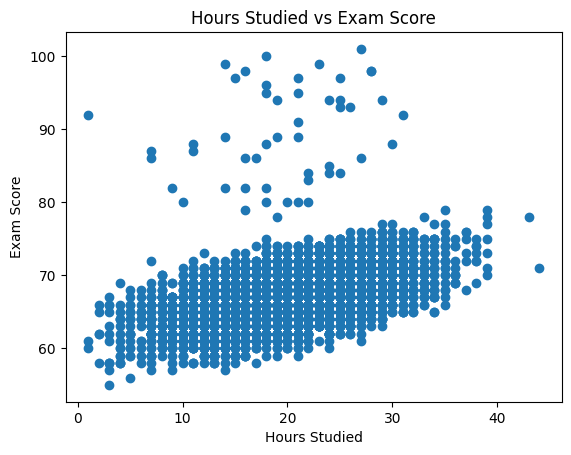

In [30]:
plt.scatter(df_clean["Hours_Studied"], df_clean["Exam_Score"])
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()

El análisis entre las horas de estudio y el puntaje del examen muestra una correlación positiva moderada (r = 0.445). El scatter plot evidencia una tendencia ascendente: a medida que aumentan las horas dedicadas al estudio, el rendimiento promedio también se incrementa.

Si bien existe dispersión y casos particulares, el patrón general sugiere que las horas de estudio tienen un impacto más relevante sobre el desempeño académico que variables como el nivel educativo de los padres, cuyo efecto resultó estadísticamente significativo pero de baja magnitud práctica.

In [31]:
df_clean[["Attendance", "Exam_Score"]].corr()

,Attendance,Exam_Score
Attendance,1.000000,0.580153
Exam_Score,0.580153,1.000000


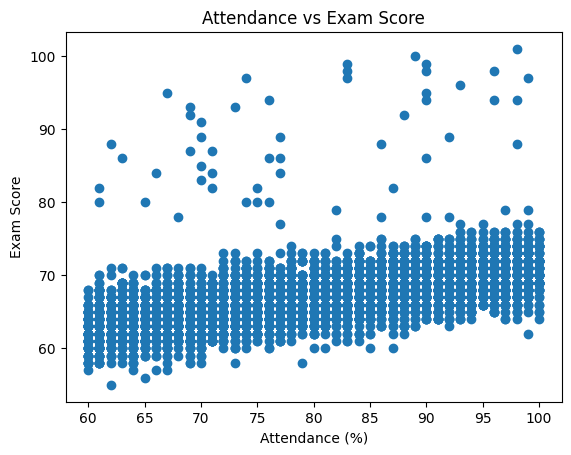

In [32]:
plt.scatter(df_clean["Attendance"], df_clean["Exam_Score"])
plt.xlabel("Attendance (%)")
plt.ylabel("Exam Score")
plt.title("Attendance vs Exam Score")
plt.show()

La relación entre la asistencia y el puntaje del examen presenta una correlación positiva moderada-alta (r = 0.58). El gráfico de dispersión evidencia una tendencia ascendente clara: los estudiantes con mayor porcentaje de asistencia suelen obtener mejores resultados académicos.

En comparación con otras variables analizadas, como las horas de estudio (r = 0.45) o el nivel educativo de los padres, la asistencia muestra un mayor poder explicativo sobre el rendimiento. Esto sugiere que la presencia regular en clase es un factor relevante para el desempeño académico, aunque no exclusivo, dado que aún existe dispersión entre los casos individuales.

In [33]:
df_clean[["Previous_Scores", "Exam_Score"]].corr()

,Previous_Scores,Exam_Score
Previous_Scores,1.000000,0.175852
Exam_Score,0.175852,1.000000


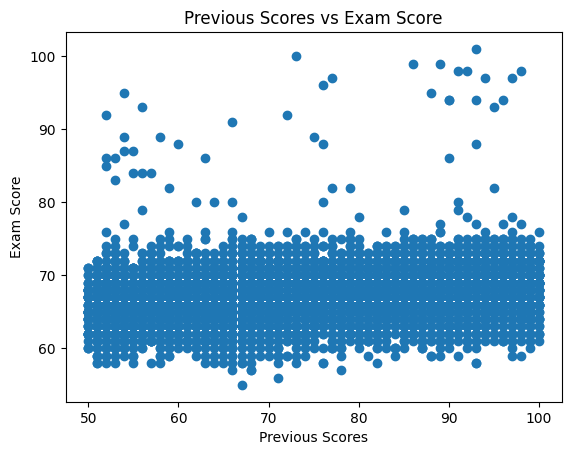

In [34]:
plt.scatter(df_clean["Previous_Scores"], df_clean["Exam_Score"])
plt.xlabel("Previous Scores")
plt.ylabel("Exam Score")
plt.title("Previous Scores vs Exam Score")
plt.show()

El desempeño previo presenta una correlación positiva débil con el puntaje del examen (r = 0.17). El bajo valor indica que las calificaciones anteriores explican solo una pequeña parte del rendimiento actual.

En comparación con variables como la asistencia (r = 0.58) o las horas de estudio (r = 0.45), el impacto de Previous_Scores resulta considerablemente menor en este conjunto de datos, sugiriendo que el rendimiento actual depende más del compromiso presente que del historial académico.

In [35]:
df_clean[["Sleep_Hours", "Exam_Score"]].corr()

,Sleep_Hours,Exam_Score
Sleep_Hours,1.000000,-0.017547
Exam_Score,-0.017547,1.000000


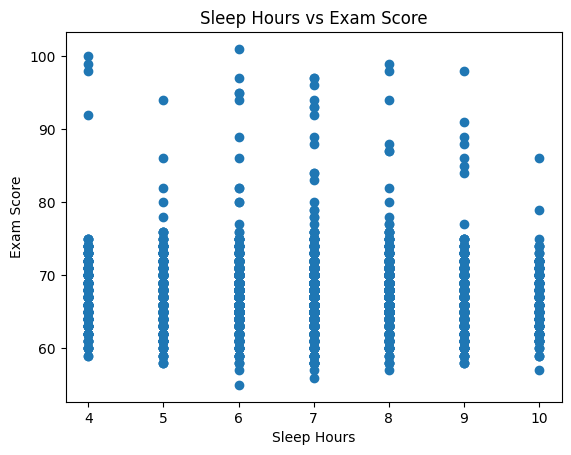

In [36]:
plt.scatter(df_clean["Sleep_Hours"], df_clean["Exam_Score"])
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.title("Sleep Hours vs Exam Score")
plt.show()

El análisis entre las horas de sueño y el puntaje del examen arroja una correlación prácticamente nula (r = -0.017), lo que indica ausencia de relación lineal entre ambas variables.

En este conjunto de datos, el número de horas dormidas no muestra capacidad explicativa sobre el rendimiento académico, a diferencia de factores como la asistencia o las horas de estudio. Esto sugiere que el impacto del sueño podría estar oculto por el ruido del dataset o requerir un análisis no lineal para ser detectado.

# **Conclusión**

A partir del análisis exploratorio sobre el rendimiento académico (Exam_Score), se evaluó la relación con distintas variables explicativas.

Los resultados muestran que la asistencia a clases (Attendance) es el factor más influyente, con una correlación moderada-alta (r = 0.58). Los estudiantes con mayor presencia en clase tienden a obtener mejores resultados.

En segundo lugar, las horas de estudio (Hours_Studied) presentan una relación positiva moderada (r = 0.45), indicando que dedicar más tiempo al estudio mejora el rendimiento promedio, aunque con variabilidad entre individuos.

El nivel educativo de los padres (Parental_Education_Level) mostró diferencias estadísticamente significativas mediante ANOVA, pero con un impacto práctico reducido, ya que las distribuciones presentan alta superposición y diferencias promedio cercanas a un punto.

Por otro lado, el desempeño previo (Previous_Scores) evidenció una relación débil (r = 0.17), lo que sugiere que el rendimiento actual depende más del compromiso presente que del historial académico.

Finalmente, las horas de sueño (Sleep_Hours) no mostraron relación lineal con el puntaje del examen (r ≈ 0), indicando que, dentro de este dataset, no aportan capacidad explicativa relevante.

En conjunto, el análisis sugiere que los factores asociados al comportamiento actual del estudiante, especialmente la asistencia y el tiempo de estudio, tienen mayor impacto que las características familiares o históricas.

# **Modelo predictivo**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [38]:
features = ["Attendance", "Hours_Studied", "Previous_Scores", "Sleep_Hours"]
X = df_clean[features]
y = df_clean["Exam_Score"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [44]:
y_pred = model.predict(X_test)


In [45]:
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2: 0.6065506460988526
MAE: 1.375241153892199


El modelo de regresión lineal obtiene un coeficiente de determinación R² = 0.61, lo que indica que aproximadamente el 61% de la variabilidad del puntaje del examen es explicada por las variables incluidas en el modelo. Este resultado sugiere un buen desempeño predictivo para un modelo base, coherente con los hallazgos del análisis exploratorio.
El modelo presenta un error absoluto medio (MAE) de 1.38 puntos, lo que indica que, en promedio, las predicciones difieren del valor real del examen en poco más de un punto. Esto refleja una buena precisión para un modelo base de regresión lineal.

In [46]:

pd.DataFrame({
    "Variable": features,
    "Coeficiente": model.coef_
}).sort_values(by="Coeficiente", ascending=False)

,Variable,Coeficiente
1,Hours_Studied,0.288936
0,Attendance,0.198940
2,Previous_Scores,0.049345
3,Sleep_Hours,-0.016292


El análisis de los coeficientes del modelo de regresión lineal indica que las variables con mayor impacto en la predicción del rendimiento son las horas de estudio (coef. = 0.29) y la asistencia (coef. = 0.20). Esto sugiere que aumentar el tiempo dedicado al estudio y la presencia en clase mejora el puntaje esperado del examen.

El desempeño previo presenta un efecto reducido (coef. = 0.05), mientras que las horas de sueño no aportan señal relevante en el modelo (coef. ≈ 0), lo cual es coherente con los resultados observados durante el análisis exploratorio.